# Multiple qubits, Superposition and Entanglement

## Learning goals

* Be comfortable creating multi-qubit circuits

* Understand tensor product states intuitively

* See the difference between:

* product states

* superposition across qubits

* entangled states

* Apply and understand two-qubit gates (CNOT first)

* Measure multi-qubit systems and interpret correlations

* Use Qiskit’s tools to inspect multi-qubit states

## 1. Two qubits, no superposition, no entanglement

## $\ket{00} = \ket{0} \otimes \ket{0} $

In [16]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2) # initialise a quantum circuit with two qubits in the 0 state with no gates
state = Statevector.from_instruction(qc)

print(state.data)
print(state.probabilities_dict())

[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
{np.str_('00'): np.float64(1.0)}


## 2. Two qubits, independent superposition, no entanglement

## $ (H \otimes I)\ket{00} = \dfrac{1}{\sqrt{2}} (\ket{00} + \ket{10})$

[0.70710678+0.j 0.70710678+0.j 0.        +0.j 0.        +0.j]
{np.str_('00'): np.float64(0.4999999999999999),
 np.str_('01'): np.float64(0.4999999999999999)}


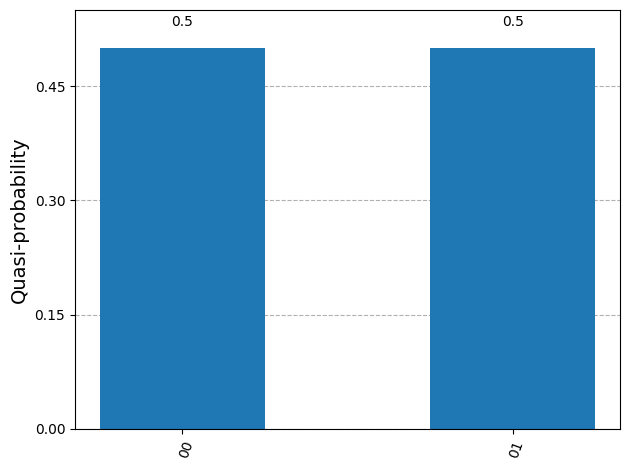

In [29]:
from qiskit.visualization import plot_histogram
import pprint

qc = QuantumCircuit(2)
qc.h(0)

state = Statevector.from_instruction(qc)
print(state.data)
pprint.pp(state.probabilities_dict())
plot_histogram(state.probabilities_dict())

### Important note about a Qiskit convention - it uses little endian ordering. Meaning qubit 0 is the least significant bit (rightmost bit). So when we applied a Hadamard gate to qubit 0 we actually applied it to the right qubit, not the left, hence why we see the $\ket{01}$ state populated, and not the $\ket{10}$

## 3. Equal superposition across all states, still no entanglement

## $ (H \otimes H)\ket{00} = \dfrac{1}{2} (\ket{00} + \ket{01}+\ket{10} + \ket{11})$

In [30]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)

state = Statevector.from_instruction(qc)
print(state.data)
pprint.pp(state.probabilities_dict())

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]
{np.str_('00'): np.float64(0.2499999999999999),
 np.str_('01'): np.float64(0.2499999999999999),
 np.str_('10'): np.float64(0.2499999999999999),
 np.str_('11'): np.float64(0.2499999999999999)}


## Generalised uniform superposition state

## $H^{\otimes n} \lvert 0 \ldots 0 \rangle = \frac{1}{\sqrt{2^n}} \sum_{x=0}^{2^n - 1} \lvert x \rangle = \ket{+}^{\otimes n}$

### Preparing the uniform superposition state is often step 1 of many quantum algorithms like Deutsch-Joza, Grover, QFT etc

### Why? It prepares the state in a uniform distribution of all states

{np.str_('0000'): np.float64(0.06249999999999996),
 np.str_('0001'): np.float64(0.06249999999999996),
 np.str_('0010'): np.float64(0.06249999999999996),
 np.str_('0011'): np.float64(0.06249999999999996),
 np.str_('0100'): np.float64(0.06249999999999996),
 np.str_('0101'): np.float64(0.06249999999999996),
 np.str_('0110'): np.float64(0.06249999999999996),
 np.str_('0111'): np.float64(0.06249999999999996),
 np.str_('1000'): np.float64(0.06249999999999996),
 np.str_('1001'): np.float64(0.06249999999999996),
 np.str_('1010'): np.float64(0.06249999999999996),
 np.str_('1011'): np.float64(0.06249999999999996),
 np.str_('1100'): np.float64(0.06249999999999996),
 np.str_('1101'): np.float64(0.06249999999999996),
 np.str_('1110'): np.float64(0.06249999999999996),
 np.str_('1111'): np.float64(0.06249999999999996)}


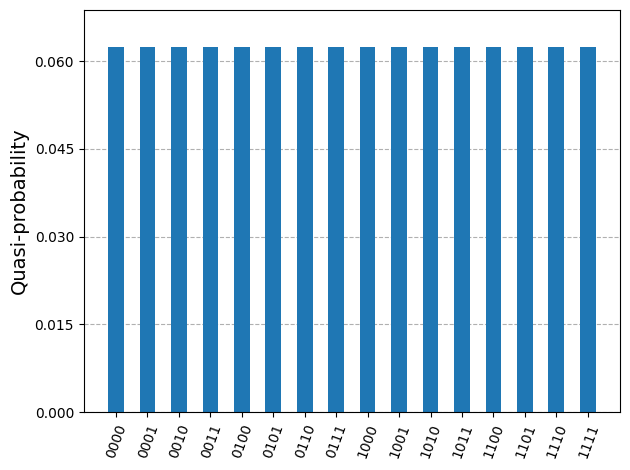

In [32]:
n = 4
qc = QuantumCircuit(n)

for i in range(n):
    qc.h(i)

# or if you want to be slick
# qc.h(range(n)) 

state = Statevector.from_instruction(qc)
pprint.pp(state.probabilities_dict())
plot_histogram(state.probabilities_dict(), bar_labels=False)

## 4. Entanglement

## To entangle qubits we need to introduce our first two qubit gate CNOT

## CNOT says "if our control qubit is a 1, then apply NOT to our target qubit"

{np.str_('00'): np.float64(1.0)}


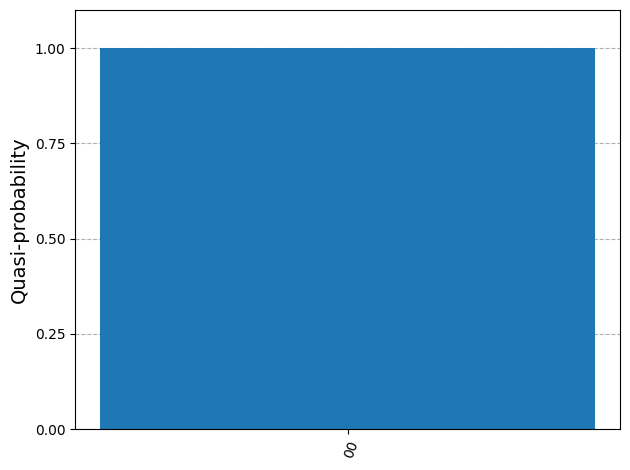

In [41]:
qc = QuantumCircuit(2)
qc.cx(control_qubit=0, target_qubit=1)

state = Statevector.from_instruction(qc)
pprint.pp(state.probabilities_dict())
plot_histogram(state.probabilities_dict(), bar_labels=False)

## Nothing happens because out control qubit was in the 0 state

## If we apply H to qubit 0 first

## $ CNOT (H \otimes I)\ket{00} = \dfrac{1}{\sqrt{2}} (\ket{00} + \ket{11})$

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]
{np.str_('00'): np.float64(0.4999999999999999),
 np.str_('11'): np.float64(0.4999999999999999)}


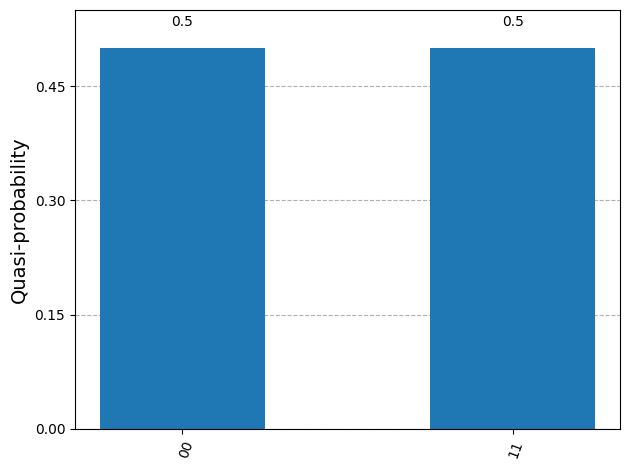

In [47]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
print(state.data)
pprint.pp(state.probabilities_dict())
plot_histogram(state.probabilities_dict())

## Why is $\dfrac{1}{\sqrt{2}} (\ket{00} + \ket{11})$ an entangled state but $\dfrac{1}{\sqrt{2}} (\ket{00} + \ket{01})$ is not?

# Exercise:

## There are four bell states (maximally entangled states). We have made the first one $\ket{\Phi^+}$. Can you make the other three?

### $\ket{\Phi^+} = \dfrac{1}{\sqrt{2}} (\ket{00} + \ket{11})$

### $\ket{\Phi^-} = \frac{1}{\sqrt{2}}\big(\ket{00} - \ket{11}\big)$

### $\ket{\Psi^+} = \frac{1}{\sqrt{2}}\big(\ket{01} + \ket{10}\big)$

### $\ket{\Psi^-} = \frac{1}{\sqrt{2}}\big(\ket{01} - \ket{10}\big)$

In [48]:
# Answer here

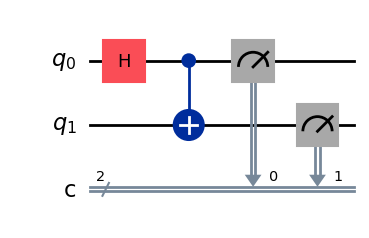

In [58]:
from qiskit_aer import AerSimulator

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1]) # measure qubit(s) [0, 1] into classical bit(s) [0, 1] respectively
qc.draw(output='mpl')

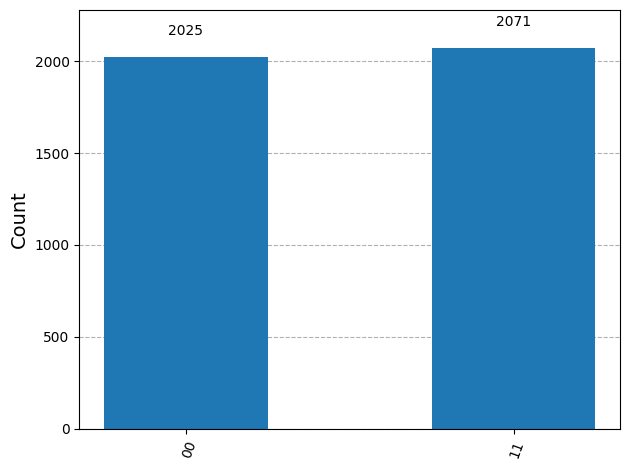

In [57]:
sim = AerSimulator()
result = sim.run(qc, shots=4096).result()
counts = result.get_counts()
plot_histogram(counts)

## Let's break entanglement down a bit more

### We will prepare a Bell state and measure the qubits individually.

In [64]:
# Step 1: prepare Bell state
# Bell state |Φ+> = (|00> + |11>)/√2
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Get the statevector
state = Statevector.from_instruction(qc)
print(state)

# Step 2: Measure qubit 0 and collapse the state
outcome_0, state_after_0 = state.measure([0])
print("Qubit 0 measured:", outcome_0)
print("State after measuring qubit 0:", state_after_0)

# Step 3: Measure qubit 1
outcome_1, state_after_1 = state_after_0.measure([1])
print("Qubit 1 measured:", outcome_1)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))
Qubit 0 measured: 1
State after measuring qubit 0: Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
            dims=(2, 2))
Qubit 1 measured: 1


In [67]:
# Repeat for N shots to show correlation every time
shots = 10
for i in range(shots):
    outcome_0, state_after_0 = state.measure([0])
    outcome_1, state_after_1 = state_after_0.measure([1])
    print(f"Run {i+1}: qubit0={outcome_0}, qubit1={outcome_1}")

Run 1: qubit0=1, qubit1=1
Run 2: qubit0=0, qubit1=0
Run 3: qubit0=0, qubit1=0
Run 4: qubit0=1, qubit1=1
Run 5: qubit0=1, qubit1=1
Run 6: qubit0=1, qubit1=1
Run 7: qubit0=1, qubit1=1
Run 8: qubit0=0, qubit1=0
Run 9: qubit0=0, qubit1=0
Run 10: qubit0=0, qubit1=0


## If we do the same experiment with a product state we see no correlation between the qubits

In [69]:
# Product state |0> ⊗ (|0> + |1>)/√2
state_product = Statevector.from_label('0')
state_product = state_product.tensor(Statevector([1/2**0.5, 1/2**0.5]))

# Stepwise measurement
shots = 10
for i in range(shots):
    outcome_0, state_after_0 = state_product.measure([0])
    outcome_1, state_after_1 = state_after_0.measure([1])
    print(f"Run {i+1}: qubit0={outcome_0}, qubit1={outcome_1}")

Run 1: qubit0=0, qubit1=0
Run 2: qubit0=1, qubit1=0
Run 3: qubit0=1, qubit1=0
Run 4: qubit0=0, qubit1=0
Run 5: qubit0=0, qubit1=0
Run 6: qubit0=1, qubit1=0
Run 7: qubit0=0, qubit1=0
Run 8: qubit0=1, qubit1=0
Run 9: qubit0=1, qubit1=0
Run 10: qubit0=0, qubit1=0


### There is actually a very subtle reason why we have not technically demonstrated entanglement yet? All we have demonstrated is correlation which is perfectly reproducable in a classical system. There is however one way to demonstrate entanglement in our quantum system once and for all. Do you know what it is? It requires adding one line of code below

In [72]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Get statevector
state = Statevector.from_instruction(qc)

# --- STUDENT TASK ---
# Add ONE line here to change the measurement basis (Hint: single-qubit gate)
# Example: rotate to X-basis
qc.h([0,1])

# Stepwise measurement simulation
shots = 10
for i in range(shots):
    # Measure qubit 0
    outcome_0, state_after_0 = state.measure([0])
    
    # Measure qubit 1
    outcome_1, state_after_1 = state_after_0.measure([1])
    
    print(f"Run {i+1}: qubit 0 = {outcome_0}, qubit 1 = {outcome_1}")

Run 1: qubit 0 = 0, qubit 1 = 0
Run 2: qubit 0 = 1, qubit 1 = 1
Run 3: qubit 0 = 1, qubit 1 = 1
Run 4: qubit 0 = 1, qubit 1 = 1
Run 5: qubit 0 = 1, qubit 1 = 1
Run 6: qubit 0 = 0, qubit 1 = 0
Run 7: qubit 0 = 0, qubit 1 = 0
Run 8: qubit 0 = 1, qubit 1 = 1
Run 9: qubit 0 = 0, qubit 1 = 0
Run 10: qubit 0 = 0, qubit 1 = 0
